# Analyse questionnaire page accueil BCD

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
class DictTable(dict):
    # Overridden dict class which takes a dict in the form {'a': 2, 'b': 3},
    # and renders an HTML Table in IPython Notebook.
    def _repr_html_(self):
        html = ["<table width=30%>"]
        for key, value in self.items():
            html.append("<tr>")
            html.append("<td><b>{0}</b></td>".format(key))
            html.append("<td>{0}</td>".format(value))
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
    
def tri_dico(dico):
    return {k: v for k, v in sorted(dico.items(), key=lambda item:item[1], reverse=True)}

In [3]:
df = pd.read_excel('sondageBCD_trad.xlsx')
#cast en type date
df['Date de soumission'] = pd.to_datetime(df['Date de soumission'])

In [60]:
df

,ID de la réponse,Date de soumission,Dernière page,Langue de départ,Tête de série,Date de lancement,Date de la dernière action,Pourriez vous lister les missions de BCD ?,Pourriez-vous nommer les sites animés par BCD ?,"Si vous avez des questions sur le patrimoine, sur quel site géré par BCD vous dirigeriez-vous ?",...,Regardez-vous la page Actualités ?,Regardez-vous le Slider ?,Classez par ordre de d'importance les informations que vous souhaiteriez trouver sur le site. [Classement 1],Classez par ordre de d'importance les informations que vous souhaiteriez trouver sur le site. [Classement 2],Classez par ordre de d'importance les informations que vous souhaiteriez trouver sur le site. [Classement 3],Classez par ordre de d'importance les informations que vous souhaiteriez trouver sur le site. [Classement 4],Classez par ordre de d'importance les informations que vous souhaiteriez trouver sur le site. [Classement 5],Classez par ordre de d'importance les informations que vous souhaiteriez trouver sur le site. [Classement 6],Classez par ordre de d'importance les informations que vous souhaiteriez trouver sur le site. [Classement 7],Commentaires libres
0,9,2020-03-09 10:46:06,2,fr,1632807564,2020-03-09 10:26:21,2020-03-09 10:46:06,- vulgariser et diffuser la culture et les sav...,Bazhalan becedia bed pci bretania,PCI,...,Oui,Non,Les différentes actions de BCD,Les partenaires,Les projets en cours,Le projet associatif,Les différents sites de BCD,Les salariés de l'association,NaN,NaN
1,10,NaT,0,fr,2129498434,2020-03-09 10:41:02,2020-03-09 10:41:02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11,2020-03-09 14:09:43,2,fr,1583135970,2020-03-09 14:08:48,2020-03-09 14:09:43,NaN,NaN,NaN,...,Non,Non,Les différents sites de BCD,Les différentes actions de BCD,NaN,NaN,NaN,NaN,NaN,NaN
3,12,NaT,0,fr,286833738,2020-03-09 18:17:37,2020-03-09 18:17:37,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13,2020-03-09 18:51:02,2,fr,2081881169,2020-03-09 18:38:34,2020-03-09 18:51:02,Non,Non,Je ne sais pas,...,NaN,Non,Les projets en cours,Le projet associatif,Les différentes actions de BCD,Les différents sites de BCD,Les partenaires,Les comptes rendus des assemblées générales,Les salariés de l'association,"Je n'ai rien à ajouter, je viendrai plus souve..."
5,14,2020-03-10 08:16:39,2,fr,1896966050,2020-03-10 08:08:52,2020-03-10 08:16:39,"Vulgariser, diffuser la matière culturelle et ...",bretania\nbed\npci\nTAP\nBécédia,pci,...,Oui,Oui,Les différentes actions de BCD,Le projet associatif,Les projets en cours,Les salariés de l'association,Les comptes rendus des assemblées générales,Les partenaires,Les différents sites de BCD,NaN
6,15,NaT,1,fr,1042906548,2020-03-10 09:02:07,2020-03-10 09:02:51,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,16,2020-03-10 11:45:49,2,fr,2145875740,2020-03-10 11:40:51,2020-03-10 11:45:49,Valoriser la culture de Bretagne et la vulgari...,"Bécédia, Bretania,",Bretania,...,Non,Oui,Les différents sites de BCD,Les différentes actions de BCD,Les partenaires,Le projet associatif,Les projets en cours,Les salariés de l'association,Les comptes rendus des assemblées générales,NaN
8,17,2020-03-10 12:08:45,2,fr,669932358,2020-03-10 11:51:51,2020-03-10 12:08:45,Promouvoir la diversité de la culture bretonne...,"BCD, Bécédia, Bretania, PCI et BED.",Bretania et PCI,...,Oui,NaN,Les différents sites de BCD,Les différentes actions de BCD,Les projets en cours,Les partenaires,Le projet associatif,Les salariés de l'association,Les comptes rendus des assemblées générales,Merci de votre sollicitation et plein de succè...
9,18,2020-03-10 17:52:51,2,fr,1631548816,2020-03-10 17:44:01,2020-03-10 17:52:51,-Promouvoir la diversité cuturelle en Bretagne...,"BED , Bretania, Bécédia, Bazhvalan, PCI",Bretania,...,Oui,Oui,Les différents sites de BCD,Les projets en cours,Le projet associatif,Les différentes actions de BCD,Les partenaires,Les salariés de l'association,Les comptes rendus des assemblées générales,Valoriser le rôle et la s

## données administratives

In [4]:
print(f"Date du premier questionnaire : {df['Date de soumission'].min().strftime('%d/%m/%Y, %H:%M:%S')}")
print(f"Date du dernier questionnaire : {df['Date de soumission'].max().strftime('%d/%m/%Y, %H:%M:%S')}")
print(f"Nombre de réponses : {df.shape[0]}")
complet = df['Dernière page'].value_counts().to_dict()
print(f"Nombre de réponses complètes : {complet[2]}")
print(f"Nombre de réponses incomplètes : {complet[0] + complet[1]}")

Date du premier questionnaire : 09/03/2020, 10:46:06
Date du dernier questionnaire : 17/03/2020, 16:56:33
Nombre de réponses : 16
Nombre de réponses complètes : 11
Nombre de réponses incomplètes : 5


In [5]:
l_questions = df.columns
print('Liste des questions :')
for q in l_questions:
    print(f" - {q}")

Liste des questions :
 - ID de la réponse
 - Date de soumission
 - Dernière page
 - Langue de départ
 - Tête de série
 - Date de lancement
 - Date de la dernière action
 - Pourriez vous lister les missions de BCD ?
 - Pourriez-vous nommer les sites animés par BCD ?
 - Si vous avez des questions sur le patrimoine, sur quel site géré par BCD vous dirigeriez-vous ?
 - Si vous aviez des questions sur l'histoire de Bretagne, sur quel site de BCD iriez-vous faire des recherches ?
 - Comment avez-vous trouvé la navigation sur le site de BCD ? Facile, compliqué etc...
 - Pourriez-vous citer une action menée par BCD ?
 - Les termes utilisés sur le site vous paraissent-ils clairs ?
 - Lesquels vous paraissent peu explicites ?
 - Regardez-vous la page Actualités ?
 - Regardez-vous le Slider ?
 - Classez par ordre de d'importance les informations que vous souhaiteriez trouver sur le site. [Classement 1]
 - Classez par ordre de d'importance les informations que vous souhaiteriez trouver sur le site

## Q : _Pourriez-vous lister les missions de BCD ?_
Les catégories attendues sont :
 - Vulgariser, diffuser la matière culturelle et les savoirs de Bretagne,
 - Réaliser un inventaire permanent du Patrimoine Culturel Immatériel (PCI) breton,
 - Promouvoir la diversité culturelle,
 - Favoriser l’accessibilité et valoriser les contenus culturels et scientifiques relatifs à la Bretagne par le biais des nouvelles technologies de l’information et de la communication.
 
__Il est à noter que sont abordés : la formation, Bretania, public jeune et Bazvalan__

In [6]:
print(f"Nombre de réponses : {len(df['Pourriez vous lister les missions de BCD ?'].dropna())}")

Nombre de réponses : 10


In [7]:
for reponse in df['Pourriez vous lister les missions de BCD ?'].dropna().values:
    print(reponse)
    print('---\n')

- vulgariser et diffuser la culture et les savoirs bretons
- réaliser une inventaire du patrimoine culturel immatériel 
- promouvoir la diversité culturelle 
- favoriser l’accès et valoriser les contenus
---

Non
---

Vulgariser, diffuser la matière culturelle et les savoirs de Bretagne,
Réaliser un inventaire permanent du Patrimoine Culturel Immatériel (PCI) breton,
Promouvoir la diversité culturelle,
Favoriser l’accessibilité et valoriser les contenus culturels et scientifiques relatifs à la Bretagne par le biais des nouvelles technologies de l’information et de la communication.
---

Valoriser la culture de Bretagne et la vulgariser, animer un réseau de collaborateurs culturels, gestion du portail des cultures de Bretagne
---

Promouvoir la diversité de la culture bretonne et proposer différents médias, qui permettent de mieux connaitre et comprendre cette diversité.
---

-Promouvoir la diversité cuturelle en Bretagne ( sites BED , Bretania et Bécédia  et expo itinérante) 
- Recense

pci,6
diversité culturelles,6
nsp,6
matière culturelle,5
autre,5
valoriser TIC,3
non,2


NB : Attention aux écarts de % sur de petits effectifs


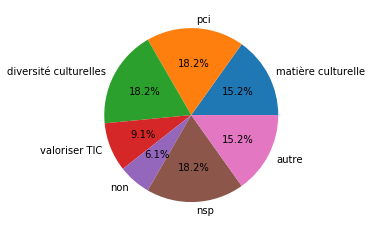

In [43]:
reponses = {
    'matière culturelle':5,
    'pci':6,
    'diversité culturelles':6,
    'valoriser TIC':3,
    'non':2,
    'nsp':6,
    'autre':5
}

plt.pie(reponses.values(), labels=reponses.keys(),autopct='%1.1f%%');
display(DictTable(tri_dico(reponses)))
print('NB : Attention aux écarts de % sur de petits effectifs')

## Q : _Pourriez-vous nommer les sites animés par BCD ?_
Les réponses attendues sont :
- BCD
- Bazhvalan
- Bécédia
- BED
- PCI  
- Bretania

In [9]:
print(f"Nombre de réponses : {len(df['Pourriez-vous nommer les sites animés par BCD ?'].dropna())}")

Nombre de réponses : 10


In [61]:
for reponse in df['Pourriez-vous nommer les sites animés par BCD ?'].dropna().values:
    print(reponse)
    print('---')

Bazhalan becedia bed pci bretania
---
Non
---
bretania
bed
pci
TAP
Bécédia
---
Bécédia, Bretania,
---
BCD, Bécédia, Bretania, PCI et BED.
---
BED , Bretania, Bécédia, Bazhvalan, PCI
---
BCD Baltivalan Becedia BED PCI Bretania bien fait pour un novice car repris en haut de la page lorsque l on navigue
---
PCI / Bretania / Bed / Bécédia
---
Becedia, Bazhvalan
---
bretania, bed, bécédia, bazhvalan, pci
---


Bécédia,8
Bretania,8
Bed,7
PCI,7
nsp,6
Bazvalan,3
BCD,2
TAP,1
non,1


NB : Attention aux écarts de % sur de petits effectifs


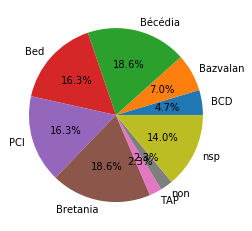

In [44]:
reponses2 = {
    'BCD':2,
    'Bazvalan':3,
    'Bécédia':8,
    'Bed':7,
    'PCI':7,
    'Bretania':8,
    'TAP':1,
    'non':1,
    'nsp':6
}
plt.pie(reponses2.values(), labels=reponses2.keys(),autopct='%1.1f%%');
display(DictTable(tri_dico(reponses2)))
print('NB : Attention aux écarts de % sur de petits effectifs')

## Q : _Si vous avez des questions sur le patrimoine, sur quel site géré par BCD vous dirigeriez-vous ?_
Les réponses attendues : Bretania et PCI

In [45]:
print(f"Nombre de réponses : {len(df['Si vous avez des questions sur le patrimoine, sur quel site géré par BCD vous dirigeriez-vous ?'].dropna())}")

Nombre de réponses : 10


In [47]:
for reponse in df['Si vous avez des questions sur le patrimoine, sur quel site géré par BCD vous dirigeriez-vous ?'].dropna().values:
    print(reponse)
    print('---')

PCI
---
Je ne sais pas
---
pci
---
Bretania
---
Bretania et PCI
---
Bretania
---
cliquer sur les trois traits en haut à droite
---
site PCI / Site Bretania
---
Je ne sais pas
---
pci
---


nsp,6
PCI,5
Bretania,4
non,2
autre,1


NB : Attention aux écarts de % sur de petits effectifs


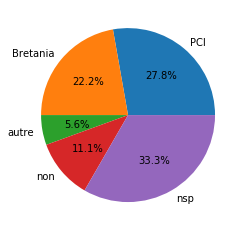

In [48]:
reponses3 = {
    'PCI':5,
    'Bretania':4,
    'autre':1,
    'non':2,
    'nsp':6
}
plt.pie(reponses3.values(), labels=reponses3.keys(),autopct='%1.1f%%');
display(DictTable(tri_dico(reponses3)))
print('NB : Attention aux écarts de % sur de petits effectifs')

## Q : _Si vous aviez des questions sur l'histoire de Bretagne, sur quel site de BCD iriez-vous faire des recherches ?_
La réponse attendue est : Bécédia

In [55]:
print('Nombre de réponses : {}'.format(len(df["Si vous aviez des questions sur l'histoire de Bretagne, sur quel site de BCD iriez-vous faire des recherches ?"].dropna())))

Nombre de réponses : 10


In [56]:
for reponse in df["Si vous aviez des questions sur l'histoire de Bretagne, sur quel site de BCD iriez-vous faire des recherches ?"].dropna().values:
    print(reponse)
    print('---')

Becedia
---
Je ne sais pas
---
Bécédia
---
Bécédia
---
BCD, Bretania et PCI . En fait, tout dépend de la thématique et du type de média recherché (?)
---
Bretania
---
site projects
---
Site Bécédia
---
Je ne sais pas
---
bécédia
---


nsp,6
Bécédia,5
Bretania,2
non,2
BCD,1
PCI,1
autre,1


NB : Attention aux écarts de % sur de petits effectifs


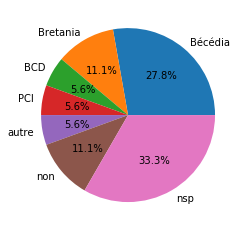

In [57]:
reponses4 = {
    'Bécédia':5,
    'Bretania':2,
    'BCD':1,
    'PCI':1,
    'autre':1,
    'non':2,
    'nsp':6
}
plt.pie(reponses4.values(), labels=reponses4.keys(),autopct='%1.1f%%');
display(DictTable(tri_dico(reponses4)))
print('NB : Attention aux écarts de % sur de petits effectifs')

## Q : _Comment avez-vous trouvé la navigation sur le site de BCD ? Facile, compliqué etc..._

In [59]:
print('Nombre de réponses : {}'.format(len(df["Comment avez-vous trouvé la navigation sur le site de BCD ? Facile, compliqué etc..."].dropna())))

Nombre de réponses : 10


In [62]:
for reponse in df["Comment avez-vous trouvé la navigation sur le site de BCD ? Facile, compliqué etc..."].dropna().values:
    print(reponse)
    print('---')

Facile, petit bémol sur la liste des sites de BCD, c’est écrit trop petit.
---
Correcte, malgré quelques anomalies mineures (ex : selon les cas, le changement de page génère ou non un nouvel onglet).
---
Simple, fluide.
Information facile d'acces
Style épuré
---
Facile
---
A la fois très facile et agréable pour une découverte générale et un peu compliquée, à dire vrai, pour la recherche d'un sujet précis.
---
pas assez intuitive
---
Facile peut être préciser pour les novices de façon bref à côté d association projects etc ...un mot clef exemple patrimoine histoire actions BCD etc....
---
facile
Beaucoup d'informations
---
C'est difficile, je ne sais où sont les choses. Il y  a des éléments que j'ai déjà vu sur le site mais il m'est difficile de les retrouver.
---
la navigation n'est pas facile car le site et ses rubriques est plutôt dense. La distinction entre les différents sites ; bécédia, bretania n'est pas évidente. J'ai pu répondre aux questions précédentes en cliquant sur chacun 